## Visualisasi Data - Visualisasi Cryptocurrency dan Stock Price

In [1]:
# lib manipulasi data
import pandas as pd
import numpy as np

# lib visualisasi data
import seaborn as sns
import matplotlib.pyplot as plt

# lib praproses data
from sklearn.preprocessing import MinMaxScaler

1. Akuisisi Data

In [2]:
# func load dataset
def load_dataset(df):

  # load dataset
  dataset = pd.read_csv("../dataset/"+df, parse_dates=['Date'])

  # set feature
  dataset = dataset[["Date", "Open", "High", "Low", "Close"]]
  
  # set index
  dataset = dataset.set_index("Date")

  # return values
  return dataset

In [3]:
# load dataset
df_btc = load_dataset("BTC-USD.csv")
print(df_btc.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3439 entries, 2015-01-01 to 2024-05-31
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    3439 non-null   float64
 1   High    3439 non-null   float64
 2   Low     3439 non-null   float64
 3   Close   3439 non-null   float64
dtypes: float64(4)
memory usage: 134.3 KB
None


In [4]:
# load dataset
df_eth = load_dataset("ETH-USD.csv")
print(df_eth.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2343 entries, 2018-01-01 to 2024-05-31
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    2343 non-null   float64
 1   High    2343 non-null   float64
 2   Low     2343 non-null   float64
 3   Close   2343 non-null   float64
dtypes: float64(4)
memory usage: 91.5 KB
None


2. Normalisasi Data

In [5]:
# func load dataset
def normalized(df):
  
  # normalize features
  scaler = MinMaxScaler(feature_range=(0, 1))
  
  # process normalized
  scaled = scaler.fit_transform(np.array(df))
  
  # return values
  return scaled

In [6]:
# normalized data
df_btc_norm = normalized(df_btc)
np.round(df_btc_norm[:],7)

array([[0.0019689, 0.0014782, 0.0020024, 0.0018674],
       [0.0018817, 0.0014157, 0.0019962, 0.0018782],
       [0.0018922, 0.0014063, 0.0015397, 0.0014125],
       ...,
       [0.9343915, 0.9334006, 0.9405221, 0.9244856],
       [0.9245116, 0.9422134, 0.9407552, 0.935279 ],
       [0.9352991, 0.9354009, 0.9339446, 0.9232967]])

In [7]:
# normalized data
df_eth_norm = normalized(df_eth)
np.round(df_eth_norm[:],7)

array([[0.1420878, 0.1450551, 0.1422102, 0.1455932],
       [0.1455981, 0.1725811, 0.1487562, 0.1692413],
       [0.1696478, 0.1849899, 0.1694899, 0.185798 ],
       ...,
       [0.794778 , 0.7896421, 0.7894382, 0.778143 ],
       [0.7785104, 0.7777818, 0.7808566, 0.7746854],
       [0.7750198, 0.7819875, 0.7855105, 0.7774725]])

3. Visualisasi Data

In [10]:
# func visualization of time series plot
def timeseries_plot(date, data, title):
  
  # create frame
  fig, ax = plt.subplots(figsize = (8,4))

  # time series plot
  ax.plot(date, data[:,0:1], color="tab:green", label="Open Price", linewidth=2)
  ax.plot(date, data[:,1:2], color="tab:orange", label="High Price", linewidth=2)
  ax.plot(date, data[:,2:3], color="tab:red", label="Low Price", linewidth=2)
  ax.plot(date, data[:,3:4], color="tab:blue", label="Close Price", linewidth=2)

  # set label-labels
  ax.set_title(title,fontsize=14)
  ax.set_xlabel("",fontsize=12)
  ax.set_ylabel("",fontsize=12)
  ax.legend(loc="best")
  ax.grid(True)

  # return values
  return plt.show()

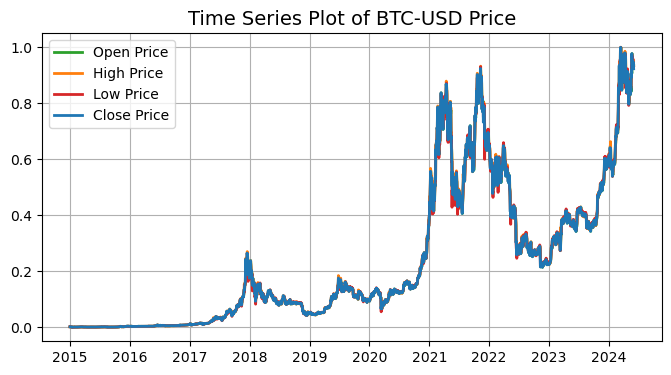

In [11]:
# BTC-USD
timeseries_plot(
  date = df_btc.index.values,
  data = df_btc_norm,
  title = "Time Series Plot of BTC-USD Price"
)

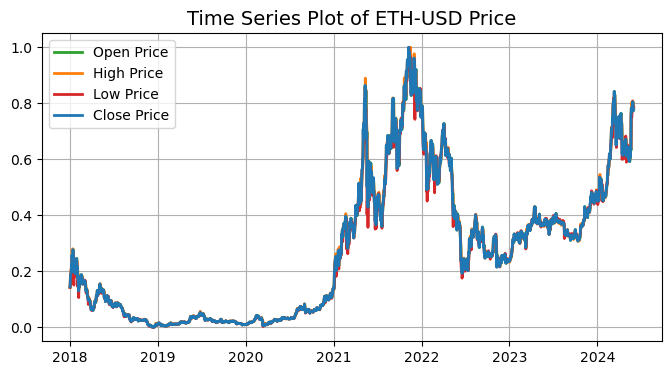

In [12]:
# ETH-USD
timeseries_plot(
  date = df_eth.index.values,
  data = df_eth_norm,
  title = "Time Series Plot of ETH-USD Price"
)